In [41]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data
import tensorflow as tf
import matplotlib.pyplot as plt

In [42]:
STOCK = 'cpall.bk'
start = datetime(2015,1,15)
df = data.DataReader(STOCK,'yahoo',start)

In [43]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-15,43.75,43.00,43.50,43.0,11647000.0,37.138481
2015-01-16,43.25,42.75,42.75,43.0,6160000.0,37.138481
2015-01-19,43.25,42.25,43.25,43.0,4555600.0,37.138481
2015-01-20,43.00,41.50,43.00,41.5,13757500.0,35.842949
2015-01-21,42.25,41.50,41.75,42.0,7926600.0,36.274792


In [44]:
len(df)

1644

In [45]:
df = df['Close']

In [46]:
date_index = df.index
price = df.values

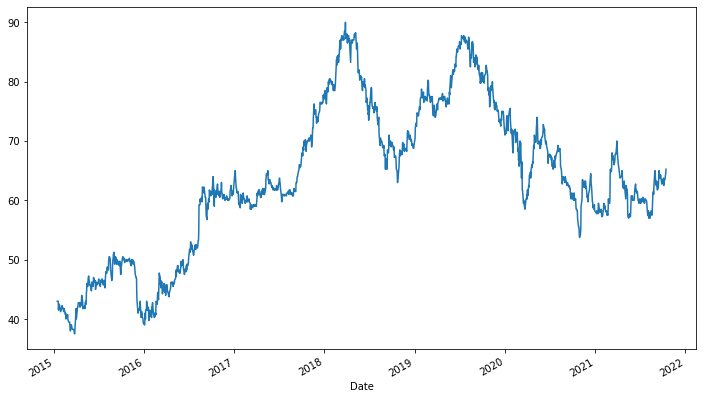

In [47]:
df.plot(figsize=(12,7))

In [48]:
split_size = int(len(df)*0.7)
date_index_train = date_index[:int(split_size)]
price_train = price[:int(split_size)]
date_index_test = date_index[int(split_size):]
price_test = price[int(split_size):]

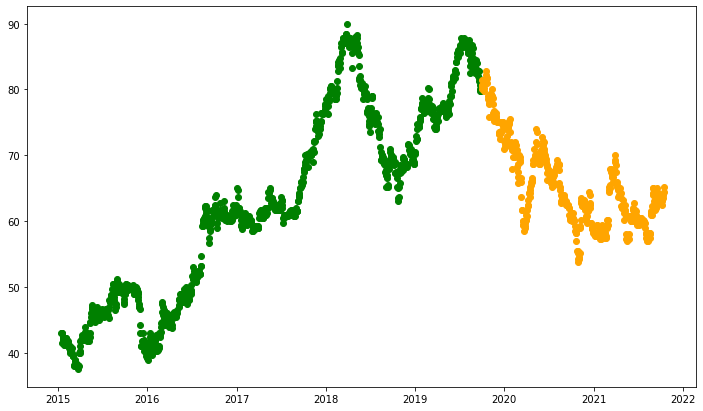

In [49]:
plt.figure(figsize=(12,7))
plt.scatter(date_index_train,price_train,color='green')
plt.scatter(date_index_test,price_test,color='orange')

In [57]:
def makeWindow(data,window,future_next):
    previosu_time= []
    future_time = []
    for i in range(len(data)-window):
        previosu_time.append(data[i:i+window])
        future_time.append(data[i+window:i+window+future_next])
    return np.array(previosu_time),np.array(future_time)

In [88]:
window = 100
out = 1
X_train,y_train = makeWindow(price_train,window,out)
X_test,y_test = makeWindow(price_test,window,out)

In [99]:
model_1 = tf.keras.models.Sequential([tf.keras.layers.Input(window),
                                      tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,1)),
                                      tf.keras.layers.LSTM(72,return_sequences=True),
                                      tf.keras.layers.LSTM(40),
                                      tf.keras.layers.Dense(1)])

In [100]:
model_1.compile(loss='mae',optimizer='Adam')

In [101]:
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, 1, 100)            0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 1, 72)             49824     
_________________________________________________________________
lstm_37 (LSTM)               (None, 40)                18080     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 41        
Total params: 67,945
Trainable params: 67,945
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_1.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/33 [=====================>........] - ETA: 0s - loss: 65.1718WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001432B063730> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

33/33 [==============================] - 0s 10ms/step - loss: 14.4692 - val_loss: 7.7788
Epoch 63/100
33/33 [==============================] - 0s 10ms/step - loss: 14.0387 - val_loss: 7.2963
Epoch 64/100
33/33 [==============================] - 0s 10ms/step - loss: 13.7718 - val_loss: 6.8400
Epoch 65/100
33/33 [==============================] - 0s 10ms/step - loss: 13.3083 - val_loss: 6.3454
Epoch 66/100
33/33 [==============================] - 0s 10ms/step - loss: 13.7418 - val_loss: 5.8758
Epoch 67/100
33/33 [==============================] - 0s 10ms/step - loss: 13.2239 - val_loss: 5.4009
Epoch 68/100
33/33 [==============================] - 0s 10ms/step - loss: 12.6213 - val_loss: 4.9570
Epoch 69/100
33/33 [==============================] - 0s 9ms/step - loss: 12.9086 - val_loss: 4.5999
Epoch 70/100
33/33 [==============================] - 0s 10ms/step - loss: 12.4822 - val_loss: 4.2789
Epoch 71/100
33/33 [==============================] - 0s 10ms/step - loss: 12.3360 - val_loss: 3

In [107]:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Input(window),
                                      tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,1)),
                                      tf.keras.layers.LSTM(122,return_sequences=True),
                                      tf.keras.layers.LSTM(72,return_sequences=True),
                                      tf.keras.layers.LSTM(40),
                                      tf.keras.layers.Dense(1)])
model_2.compile(loss='mae',optimizer='Adam')
model_2.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/33 [==========================>...] - ETA: 0s - loss: 64.5035WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000014328B7C510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

33/33 [==============================] - 0s 13ms/step - loss: 11.6245 - val_loss: 3.4877
Epoch 63/100
33/33 [==============================] - 0s 13ms/step - loss: 11.3165 - val_loss: 3.4402
Epoch 64/100
33/33 [==============================] - 0s 13ms/step - loss: 11.6640 - val_loss: 3.4042
Epoch 65/100
33/33 [==============================] - 0s 13ms/step - loss: 11.4733 - val_loss: 3.3800
Epoch 66/100
33/33 [==============================] - 0s 12ms/step - loss: 11.4549 - val_loss: 3.3709
Epoch 67/100
33/33 [==============================] - 0s 13ms/step - loss: 11.3232 - val_loss: 3.3600
Epoch 68/100
33/33 [==============================] - 0s 13ms/step - loss: 11.6305 - val_loss: 3.3567
Epoch 69/100
33/33 [==============================] - 0s 13ms/step - loss: 11.1257 - val_loss: 3.3546
Epoch 70/100
33/33 [==============================] - 0s 14ms/step - loss: 11.7660 - val_loss: 3.3521
Epoch 71/100
33/33 [==============================] - 0s 12ms/step - loss: 11.4213 - val_loss: 

In [103]:
X_test

array([[80.  , 80.5 , 81.5 , ..., 68.25, 68.75, 66.75],
       [80.5 , 81.5 , 80.75, ..., 68.75, 66.75, 67.5 ],
       [81.5 , 80.75, 80.75, ..., 66.75, 67.5 , 65.75],
       ...,
       [57.  , 57.5 , 57.5 , ..., 63.  , 63.5 , 63.5 ],
       [57.5 , 57.5 , 57.25, ..., 63.5 , 63.5 , 64.  ],
       [57.5 , 57.25, 57.75, ..., 63.5 , 64.  , 64.5 ]])

In [124]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
price = scale.fit_transform(price.reshape(1644,-1))

In [125]:
split_size = int(len(df)*0.7)
price_train = price[:int(split_size)]
price_test = price[int(split_size):]

In [126]:
window = 100
out = 1
X_train,y_train = makeWindow(price_train,window,out)
X_test,y_test = makeWindow(price_test,window,out)

In [127]:
model_3 = tf.keras.models.Sequential([tf.keras.layers.Input(window),
                                      tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,1)),
                                      tf.keras.layers.LSTM(122,return_sequences=True),
                                      tf.keras.layers.LSTM(72,return_sequences=True),
                                      tf.keras.layers.LSTM(40),
                                      tf.keras.layers.Dense(1)])
model_3.compile(loss='mae',optimizer='Adam')
model_3.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
28/33 [========================>.....] - ETA: 0s - loss: 0.7717WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000014349E6A158> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the ful

33/33 [==============================] - 0s 12ms/step - loss: 0.0609 - val_loss: 0.1234
Epoch 64/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0572 - val_loss: 0.1235
Epoch 65/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0491 - val_loss: 0.1246
Epoch 66/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0536 - val_loss: 0.1217
Epoch 67/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0518 - val_loss: 0.1280
Epoch 68/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0558 - val_loss: 0.1243
Epoch 69/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0560 - val_loss: 0.1256
Epoch 70/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0518 - val_loss: 0.1281
Epoch 71/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0586 - val_loss: 0.1297
Epoch 72/100
33/33 [==============================] - 0s 12ms/step - loss: 0.0575 - val_loss: 0.1262
Epo

In [129]:
price_predict = model_3.predict(X_test)

In [131]:
p = scale.inverse_transform(price_predict)

In [132]:
plt.plot()

array([[68.091805],
       [68.2702  ],
       [67.70246 ],
       [67.67067 ],
       [69.085754],
       [69.45671 ],
       [69.64385 ],
       [69.50355 ],
       [67.5063  ],
       [67.2477  ],
       [67.08019 ],
       [65.44698 ],
       [64.61361 ],
       [64.35122 ],
       [63.775772],
       [63.893208],
       [63.91503 ],
       [63.781315],
       [63.81396 ],
       [64.014915],
       [63.94688 ],
       [64.53414 ],
       [64.95157 ],
       [65.3894  ],
       [65.55803 ],
       [64.99961 ],
       [65.23591 ],
       [64.90457 ],
       [65.25352 ],
       [65.48771 ],
       [65.83233 ],
       [66.38533 ],
       [66.682106],
       [66.910225],
       [66.84161 ],
       [66.660164],
       [66.59736 ],
       [66.897   ],
       [66.967705],
       [66.92635 ],
       [67.136505],
       [67.06972 ],
       [67.90288 ],
       [68.026024],
       [68.27821 ],
       [69.29569 ],
       [69.451675],
       [69.23844 ],
       [69.86513 ],
       [70.98037 ],


C:\Users\n_int\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\n_int\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\n_int\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\n_int\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will

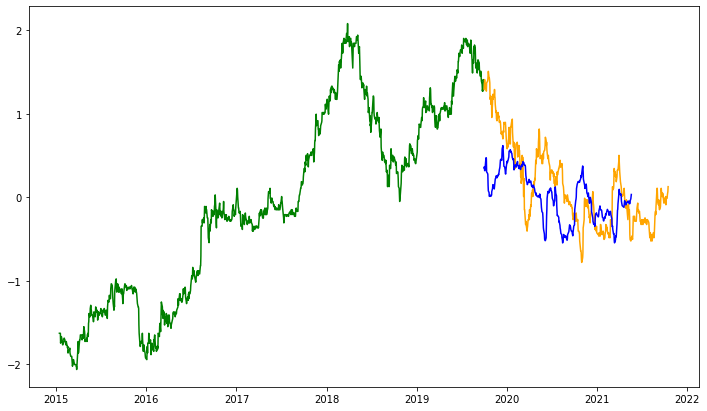

In [145]:
plt.figure(figsize=(12,7))
plt.plot(date_index_train,price_train,color='green')
plt.plot(date_index_test,price_test,color='orange')
plt.plot(date_index_test[:394],price_predict,color='blue')

In [144]:
len(price_predict)

394